In this post, I'll try to replicate the reasoning in Chris Fonnesbeck's talk "statistical thinking for data science". 

Let's start with the code. We want to build a sample of random values.

In [1]:
import numpy as np

def make_sample(size):
    "Generates a random sample."
    return np.random.normal(size=size)

In [2]:
make_sample(10)

array([-0.46661601,  0.41063078,  0.30758075,  1.60073702, -0.86336121,
       -0.23355055, -1.32449623,  0.11956636,  2.62381423, -1.26601074])

In [3]:
make_sample(20)

array([ 0.66381504, -0.28121257,  0.2762167 , -0.68387184, -2.0854523 ,
        0.54882485, -1.21564105, -2.59720332, -0.61130765, -0.78036254,
       -1.07960788, -1.03531623, -0.45372958, -0.14735239, -0.904162  ,
       -0.34943136, -0.55128214,  0.82399238,  1.194479  ,  0.12733662])

What he then does, is that he builds in a bias. What sort of bias?

- some values are missing
- the negative values are left out

Let's tackle these two separately. First, missing values.

In [4]:
def missing(true_sample, prob):
    "Removes missing values following a binomial law."
    missing_indices = np.random.binomial(1, prob, size=true_sample.size).astype(np.bool)
    return true_sample[~missing_indices]

What this function does is as follows: it first draws a vector of binomial values that it casts to booleans, then it censors the initial sample based on the values drawn. Let's check the output of a the binomial sample:

In [5]:
np.random.binomial(1, 0.1, size=20).astype(np.bool)

array([False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False], dtype=bool)

In [6]:
np.random.binomial(1, 0.5, size=20).astype(np.bool)

array([False,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True, False,  True, False, False,
       False,  True], dtype=bool)

Using the logical ~ (not) operator yields a restricted output:

In [7]:
sample = make_sample(10)
missing_sample = sample[~np.random.binomial(1, 0.5, size=10).astype(np.bool)]
print("original sample: {}".format(sample))
print("original sample with missing values: {}".format(missing_sample))

original sample: [-0.2340218  -0.72057151 -0.04013565 -1.30307987 -0.6110323   1.61743412
 -0.84212281  0.15583878 -1.79058383  1.58297096]
original sample with missing values: [-0.84212281 -1.79058383  1.58297096]


Let's plot the output from this procedure using the seaborn package.

In [9]:
import seaborn as sns

In [30]:
sns.set()
%matplotlib inline

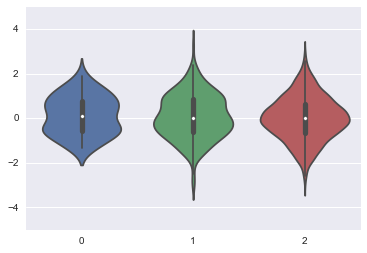

In [29]:
sns.violinplot(data=[missing(make_sample(100), 0.5),
                  missing(make_sample(500), 0.5),
                    missing(make_sample(5000), 0.5)])

We see that missing values, dont really have an effect even with lots of samples. What about censoring samples? Or, as called in the video, bias?

In [31]:
def censored(sample):
    "Returns censored sample."
    negative_values = sample < 0
    return sample[~negative_values]

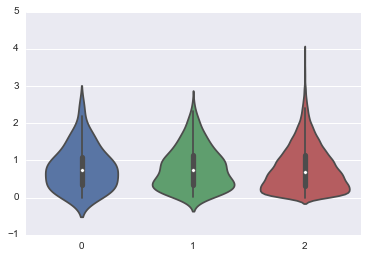

In [33]:
sns.violinplot(data=[censored(make_sample(100)),
                  censored(make_sample(500)),
                    censored(make_sample(50000))])